# Lektion 4

In [1]:
from sympy import *
init_printing()

interaktiv

In [2]:
#%matplotlib notebook

für den Druck

In [3]:
%matplotlib inline    

## 3D Graphen in matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

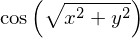

In [5]:
x = Symbol('x')
y = Symbol('y')
f = cos(sqrt(x**2+y**2))
f

In [6]:
fn = lambdify((x,y), f, 'numpy')   # probehalber 'numpy' weglassen         
f.subs(x,1.).subs(y,2.), fn(1,2)

In [7]:
xn = np.linspace(-3*np.pi, 3*np.pi)
yn = np.linspace(-3*np.pi, 3*np.pi)
X, Y = np.meshgrid(xn, yn)
X.shape

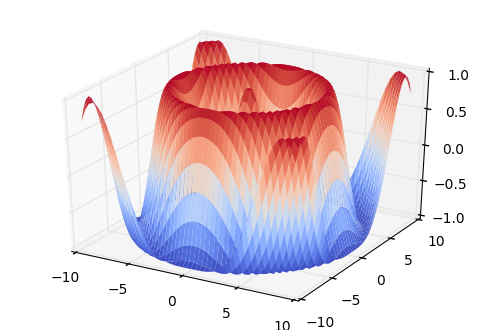

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap=plt.cm.coolwarm, linewidth=0);

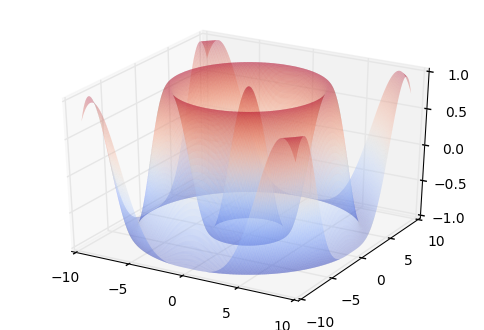

In [9]:
xn = np.linspace(-3*np.pi, 3*np.pi, 200)
yn = np.linspace(-3*np.pi, 3*np.pi, 200)
X, Y = np.meshgrid(xn, yn)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap=plt.cm.coolwarm, linewidth=0, 
                alpha=.35);

Wenn's schnell gehen soll

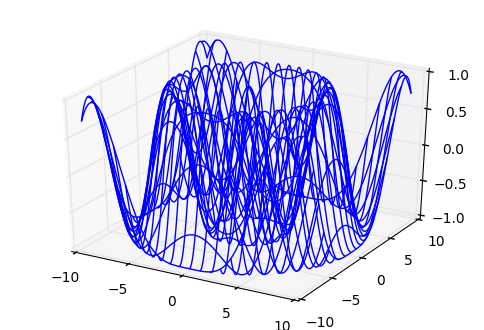

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10);

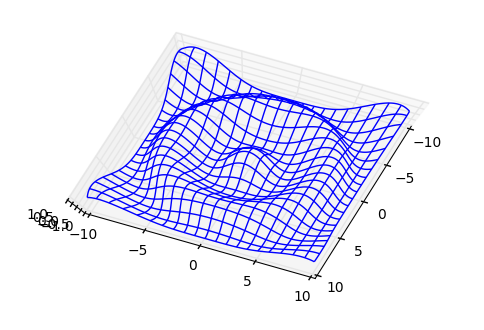

In [11]:
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.view_init(84, 23)                            # <----------

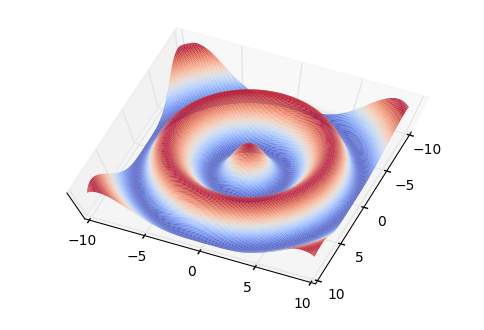

In [12]:
xn = np.linspace(-3*np.pi, 3*np.pi, 200)
yn = np.linspace(-3*np.pi, 3*np.pi, 200)
X, Y = np.meshgrid(xn, yn)
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap=plt.cm.coolwarm, linewidth=0)
ax.view_init(80, 23)
ax.set_zticks([]);

## Beschränkung der Höhe

In [13]:
g = abs(tan(x+I*y))
gn = lambdify((x,y), g, 'numpy')
gn(1, 1)

In [14]:
xn = np.linspace(-3*np.pi, 3*np.pi, 300)
yn = xn
X, Y = np.meshgrid(xn, yn)
Z = np.minimum(gn(X, Y), 5)
Z[Z>5] = np.nan

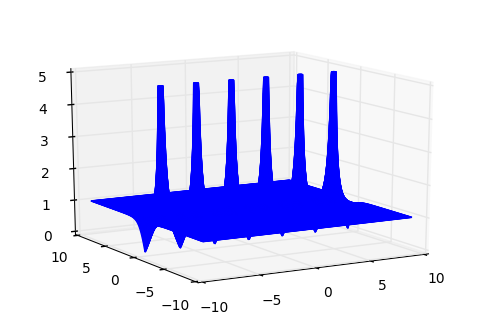

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.view_init(15,-120)

Der np.nan-Trick stört die automatische Farbgebung

In [16]:
from matplotlib.colors import Normalize

In [17]:
norm = Normalize(0, 2)

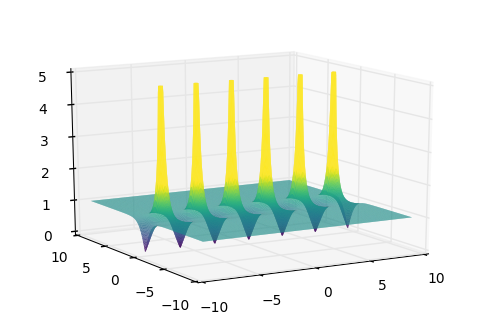

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, linewidth=0,   # Dark2 ist besonders schlecht 
                rstride=1, cstride=1, norm=norm)
ax.view_init(15,-120)

## Listen, Tupel und Mengen

In [19]:
a, b, c, A, B, C, x, y, z = symbols('a b c A B C x y z')

In [20]:
liste = [a, b, c, a]
liste

In [21]:
menge = {A, B, A, C}
menge

In [22]:
tupel = (x, y, z, y)
tupel

In [23]:
tupel[0]

In [24]:
liste[0]

In [25]:
liste[0] = c

In [26]:
menge[0]

TypeError: 'set' object does not support indexing

In [27]:
tupel[0] = y

TypeError: 'tuple' object does not support item assignment

Umwandlungen (cast-Operatoren)

In [28]:
set(liste)

In [29]:
list(menge)

In [30]:
tuple(liste)

In [31]:
list(tupel)

In [32]:
tuple(menge)

In [33]:
set(tupel)

## Dictionaries

In [34]:
d = {}
d[1] = 'eins'
d[2] = 'zwei'
d[3] = 'drei'
d

{1: 'eins', 2: 'zwei', 3: 'drei'}

In [35]:
d[3]

'drei'

In [36]:
d[4]

KeyError: 4

## List and dictionary comprehension

Listenerzeugung und Erzeugung von Dictionaries (Abbildungstypen)

In [37]:
eins_bis_fuenf = np.arange(1, 6)
eins_bis_fuenf**2

array([ 1,  4,  9, 16, 25])

In [38]:
liste_quadrate = [j**2 for j in np.arange(1,6)]
liste_quadrate

[1, 4, 9, 16, 25]

In [39]:
quadrate = { d[j]: j**2 for j in np.arange(1, 4)}
quadrate['zwei']

4

## Arrays

In [40]:
import numpy as np

In [41]:
np.array(liste)

array([c, b, c, a], dtype=object)

In [42]:
np.array([1,2,3])

array([1, 2, 3])

In [43]:
np.array([1,2,3.])

array([ 1.,  2.,  3.])

In [44]:
np.array([1, 2, 1j])

array([ 1.+0.j,  2.+0.j,  0.+1.j])

In [45]:
eins_bis_fuenf**2

array([ 1,  4,  9, 16, 25])

In [46]:
np.maximum(eins_bis_fuenf+10, eins_bis_fuenf**2)

array([11, 12, 13, 16, 25])

## Lösen von Gleichungen

In [47]:
Glg = (x-1)**2 == 4
solve(Glg)   # sytaktisch richtig, aber inhaltlich sinnlos

In [48]:
Glg = Eq((x-1)**2, 4)
Glg

In [49]:
solve(Glg)

In [50]:
Lsg = solve({Glg})
Lsg

In [51]:
Lsg[0]

In [52]:
Lsg[0][x]

In [53]:
Glg.subs(x, Lsg[0][x])

In [54]:
Glg.subs(Lsg[0])  

In [55]:
Glg1 = Eq(x**2+y**2, 1)
Glg2 = Eq(x, y)
Gls = {Glg1, Glg2}
Gls

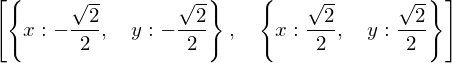

In [56]:
Lsg = solve(Gls)
Lsg

In [57]:
[Glg.subs(l) for l in Lsg for Glg in Gls]

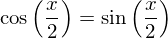

In [58]:
Glg = Eq(cos(x/2), sin(x/2))
Glg

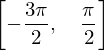

In [59]:
solve(Glg)

In [60]:
Glg = Eq(cos(x), sin(2*x))
Glg

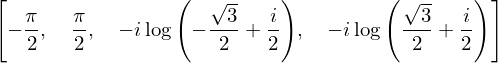

In [61]:
Lsg = solve(Glg)
Lsg

In [62]:
sin(Lsg[2]).n()

## Ungleichungen

In [63]:
f = x**2 + x + 1
g = 2*x**2
f, g

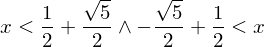

In [64]:
solve(f > g)

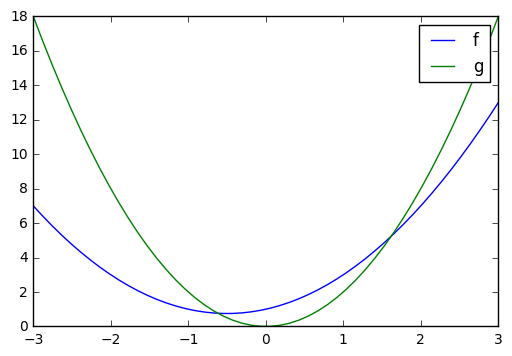

In [65]:
fn = lambdify(x, f, 'numpy')
gn = lambdify(x, g, 'numpy')
xn = np.linspace(-3, 3)
plt.plot(xn, fn(xn), label='f')
plt.plot(xn, gn(xn), label='g')
plt.legend();

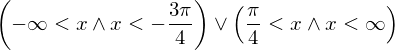

In [66]:
solve(sin(x)>cos(x), x)

bekannter Fehler 

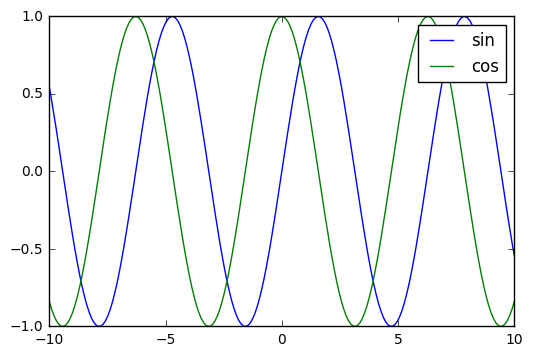

In [67]:
xn = np.linspace(-10, 10, 200)
plt.plot(xn, np.sin(xn), label='sin')
plt.plot(xn, np.cos(xn), label='cos')
plt.legend();